In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'google.colab'

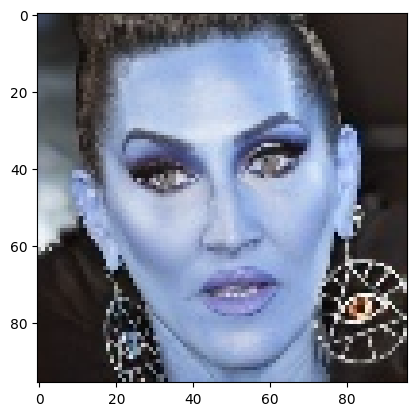

In [13]:
img=cv2.imread("c:/Users/Biswaji Deb/Documents\Affectnet Dataset/train/anger/image0000006.jpg")
plt.imshow(img)

In [14]:
img.shape

(96, 96, 3)

In [15]:
Datadirectory=("c:/Users/Biswaji Deb/Documents\Affectnet Dataset/train")
Classes = ["anger",'contempt',"disgust","fear","happy","neutral","sad","surprise"]

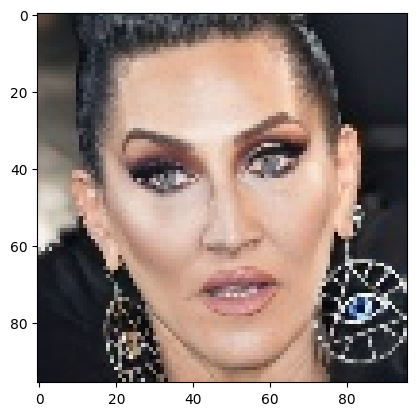

In [16]:
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb=cv2.cvtCollor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

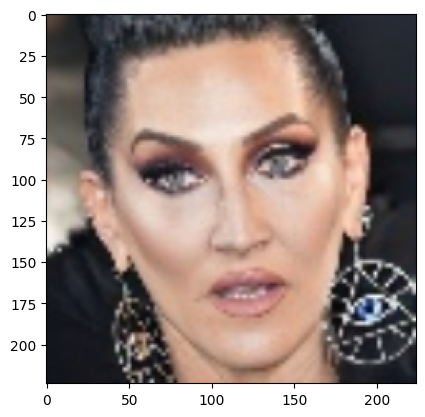

In [28]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

Read All the images and convert them to an array

In [30]:
training_data = []
def create_training_DAta():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        Class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,Class_num])
            except Exception as e:
                pass

In [31]:
create_training_DAta()

In [32]:
print(len(training_data))

17426


In [35]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)

#converting it to 4D
x=np.array(x).reshape(-1,img_size,img_size,3)

In [36]:
x.shape

(17426, 224, 224, 3)

Normalize data

In [37]:
x=x/255.0

In [40]:
y=np.array(y)

In [41]:
y.shape

(17426,)

Transfer learning

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
model = tf.keras.applications.mobilenet_v3 #PRetrained model

In [48]:
type(model)

module

In [49]:
model.layers[0]

AttributeError: module 'keras.api._v2.keras.applications.mobilenet_v3' has no attribute 'layers'